In [1]:
source('../src/load_data-02.r')
source('../src/multiplot.r')

In [2]:
attach(housing_df)

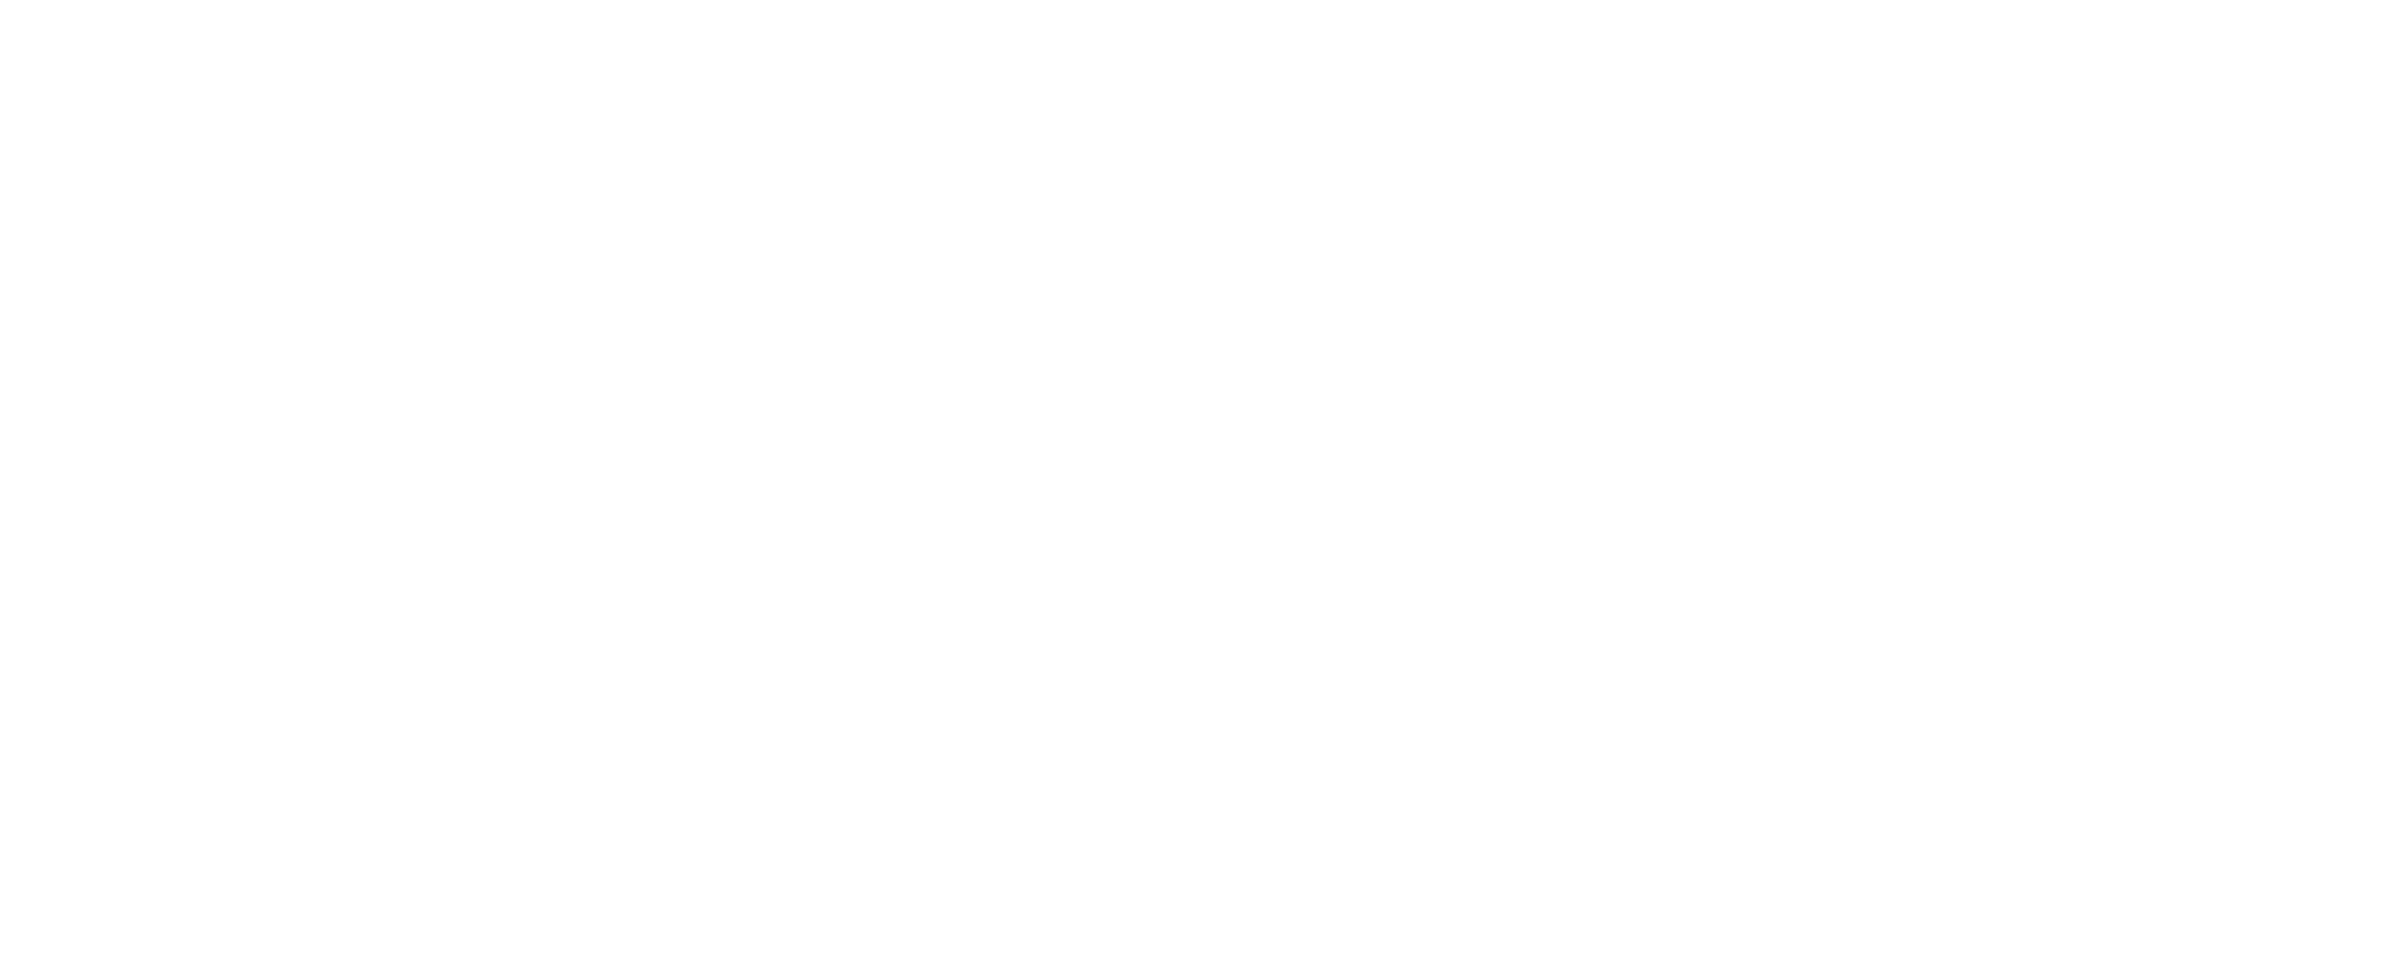

In [3]:
hist_with_kde(SalePrice)

## Testing and Estimation

Let $M$ denote the median hours price at which homes sell in Ames, Iowa. Let us test the hypothesis that median price is \$150000. 

Let $p$ denote the proporation of housees that sold for at least $150000. 

If the median sale price is \$150000, then the proportion $p=0.5$. We can restate this as the hypothesis:

$$H: p=0.5$$

In [4]:
greater_than_150k = ifelse(SalePrice >= 150000, "yes", "no")

In [5]:
table(greater_than_150k)

greater_than_150k
 no yes 
615 836 

More than 836 houses sold for more than \$150000. 

## Proportion Tests

If $H$ is true, then the number of yes's has a binomial $(n=1451, p=0.5)$ distribution with mean $np$ and variance $np(1-p)$. In addition, if $n$ is large, then the number of yes's is approximately normal. 

<img src=https://www.evernote.com/l/AAE6VhzJPI5FYYXzXeiAAgaFMQeir-3Y_0IB/image.png width=400px>

The traditional test for a proportion is based on the assumption that, when the population proportion is $p = 0.5$, the number of yes’s $y$ in a sample of $n$ is
approximately normally distributed with mean $n/2$ and standard deviation $\sqrt{n/4}$. 

The $Z$ statistic

$$Z = \frac{y-np}{\sqrt{np(1-p)}}$$

is approximately standard normal.

One computes the statistic $z_{obs}$ from the sample and one decides whether to accept or reject $H$ by computing the lower tail probability $P(Z \leq z_{obs})$. If the alternative hypothesis is that $p < 0.5$, the p-value is equal to the lower tail probability; if the alternative is two-sided where p ̸= 0.5, the p-value is double the lower-tail probability.

In [6]:
y <- 836; n <- 1451
Test <- prop.test(y, n, p=0.5, 
                  alternative = "two.sided",
                  correct = FALSE)

In [7]:
Test


	1-sample proportions test without continuity correction

data:  y out of n, null probability 0.5
X-squared = 33.66, df = 1, p-value = 6.563e-09
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.5505595 0.6013471
sample estimates:
        p 
0.5761544 


In [8]:
names(Test)

[1] "statistic"   "parameter"   "p.value"     "estimate"    "null.value" 
[6] "conf.int"    "alternative" "method"      "data.name"

In [9]:
Test$estimate

p 
0.5761544

## One-sample $t$-statistic methods

The R function `t.test` performs the calculations for the traditional inference procedures for a population mean.

If the observations represent a random sample from a normal population with unknown mean $\mu$, the statistic

$$T=\frac{\sqrt{n}(\bar{y}-\mu)}{s}$$

has a $t$ distribution with $\nu=n−1$ degrees of freedom, where $\bar{y}$, $s$, and $n$ are respectively the sample mean, sample standard deviation, and sample size.

<img src=https://www.evernote.com/l/AAHk8pjyuCVJDbOOSbLzJS0qAFgszP_zH2gB/image.png width=400px>

To illustrate this function, suppose we wish to test the hypothesis that the mean sale price is \$162K  and also construct a 90% interval estimate for the population mean. 

Because the t-test assumes normality in the underlying data, before we use `t.test`, we should check if it is reasonable to assume the sale prices are normally distributed. 

*[Can I use a t-test if the data is not normal](http://thestatsgeek.com/2013/09/28/the-t-test-and-robustness-to-non-normality/)?*

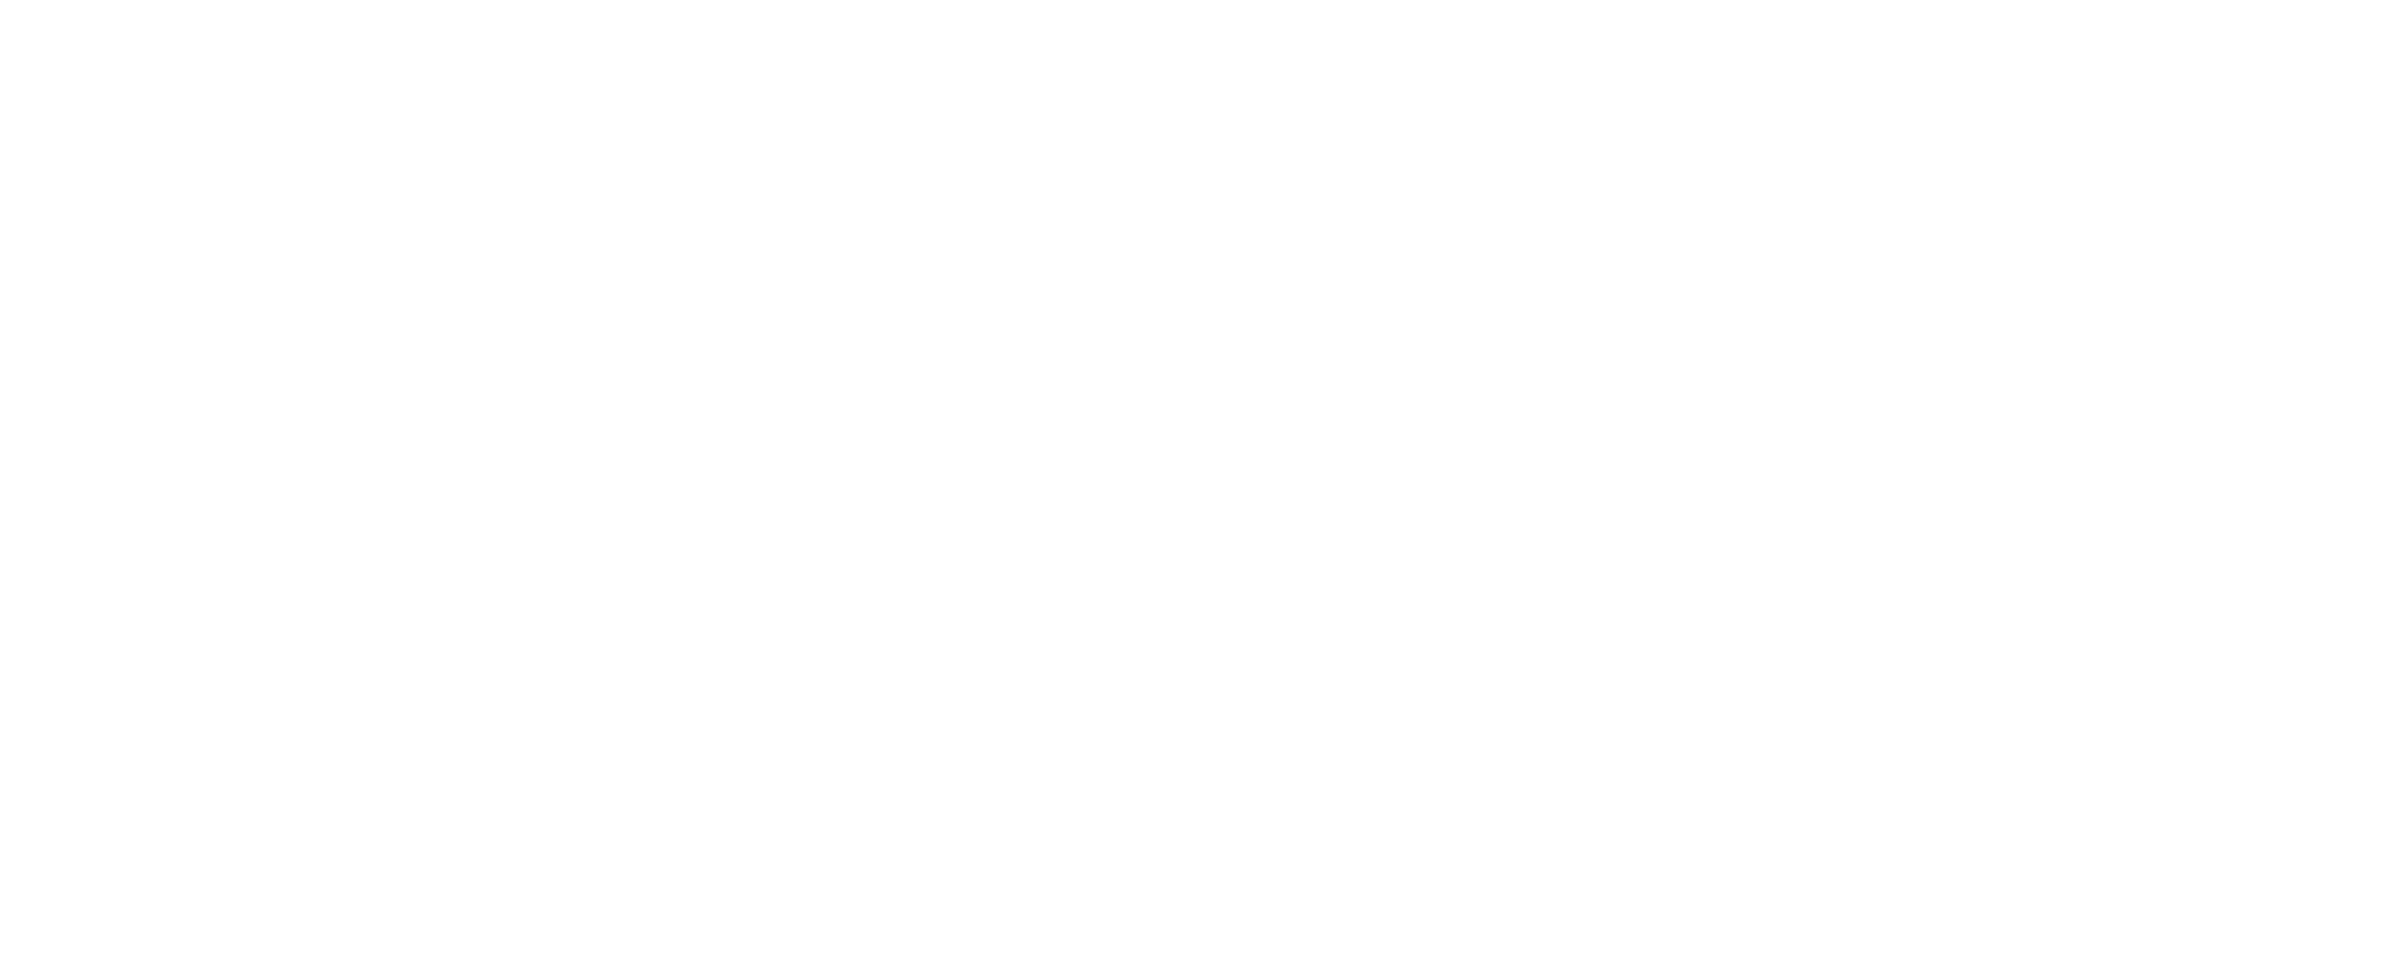

In [10]:
hist_with_kde(SalePrice)

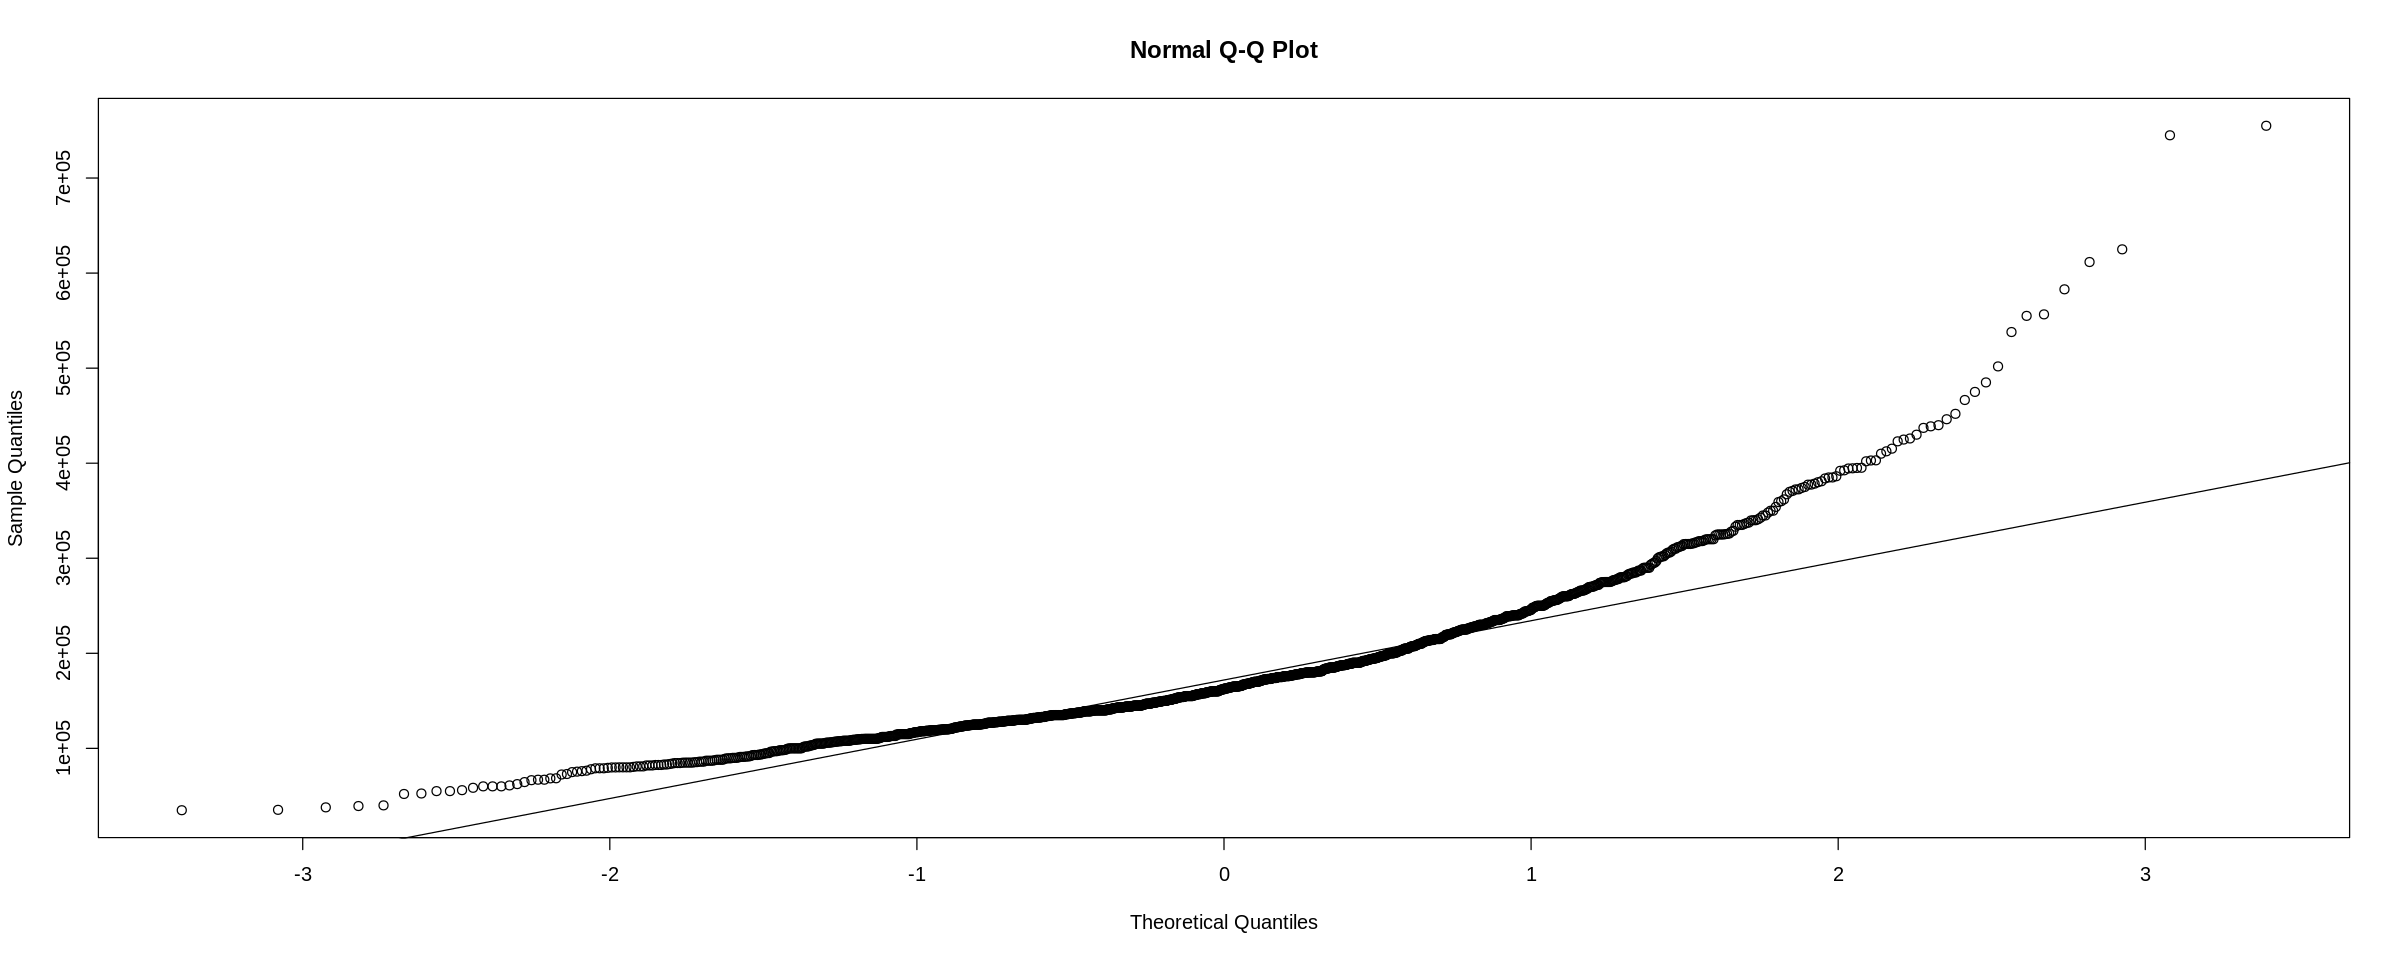

In [11]:
qqnorm(SalePrice)
qqline(SalePrice)

A histogram of the times is constructed by the hist function. The `qqnorm` function produces a normal probability plot of the prices and the `qqline` function overlays a line on the plot passing through the first and third quartiles.

Looking at the graph, it is clear that there are some values that are not consistent with the normal distribution assumption. There are several ways one could handle this problem:

- one could **remove the outliers** and apply the t methods to the modified data
- one could apply a different inferential procedure that rests on a more general assumption about the distribution of the population i.e a **nonparametric method**

### Remove The Outliers

In [12]:
SalePrice.less_than300000 <- SalePrice[SalePrice < 3E5]

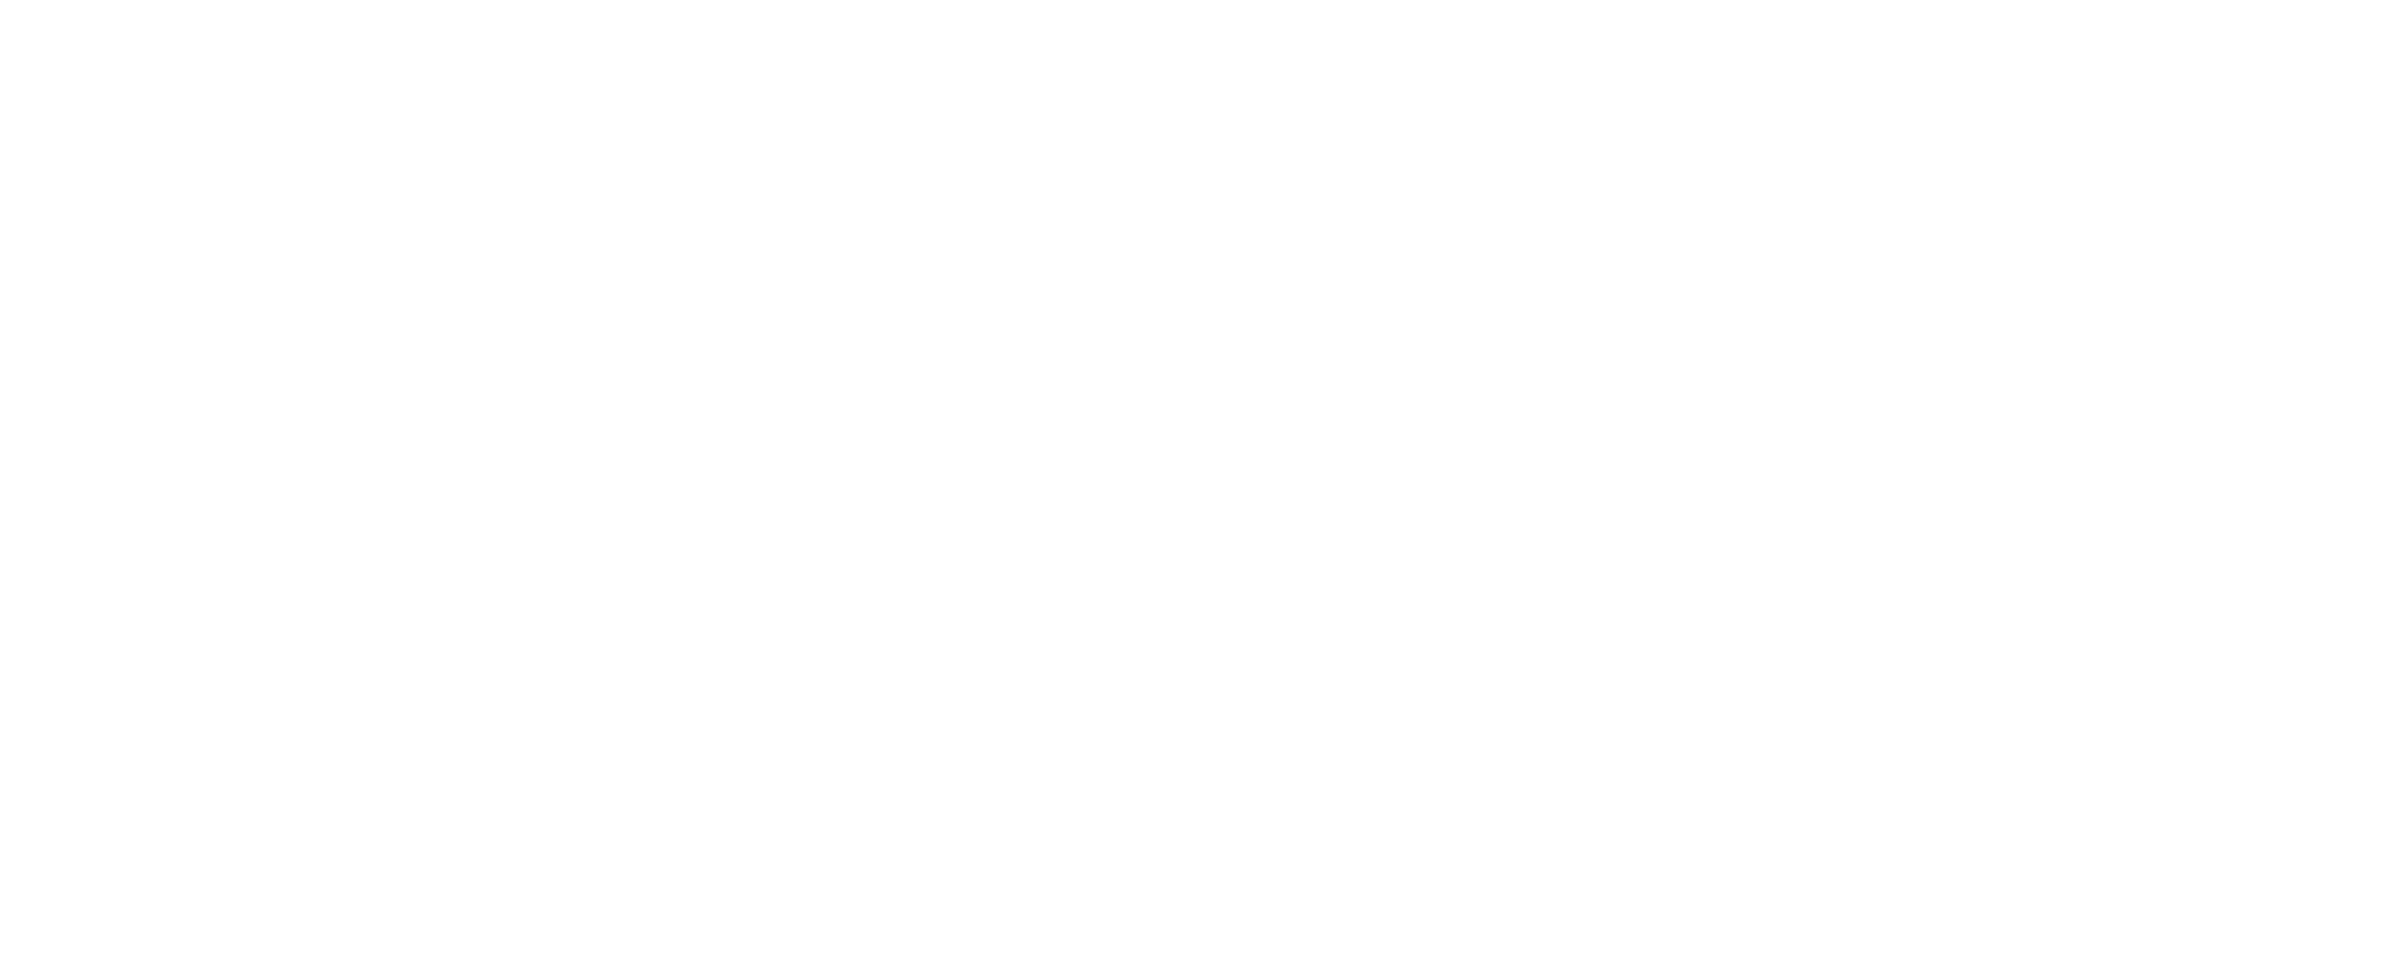

In [13]:
hist_with_kde(SalePrice.less_than300000)

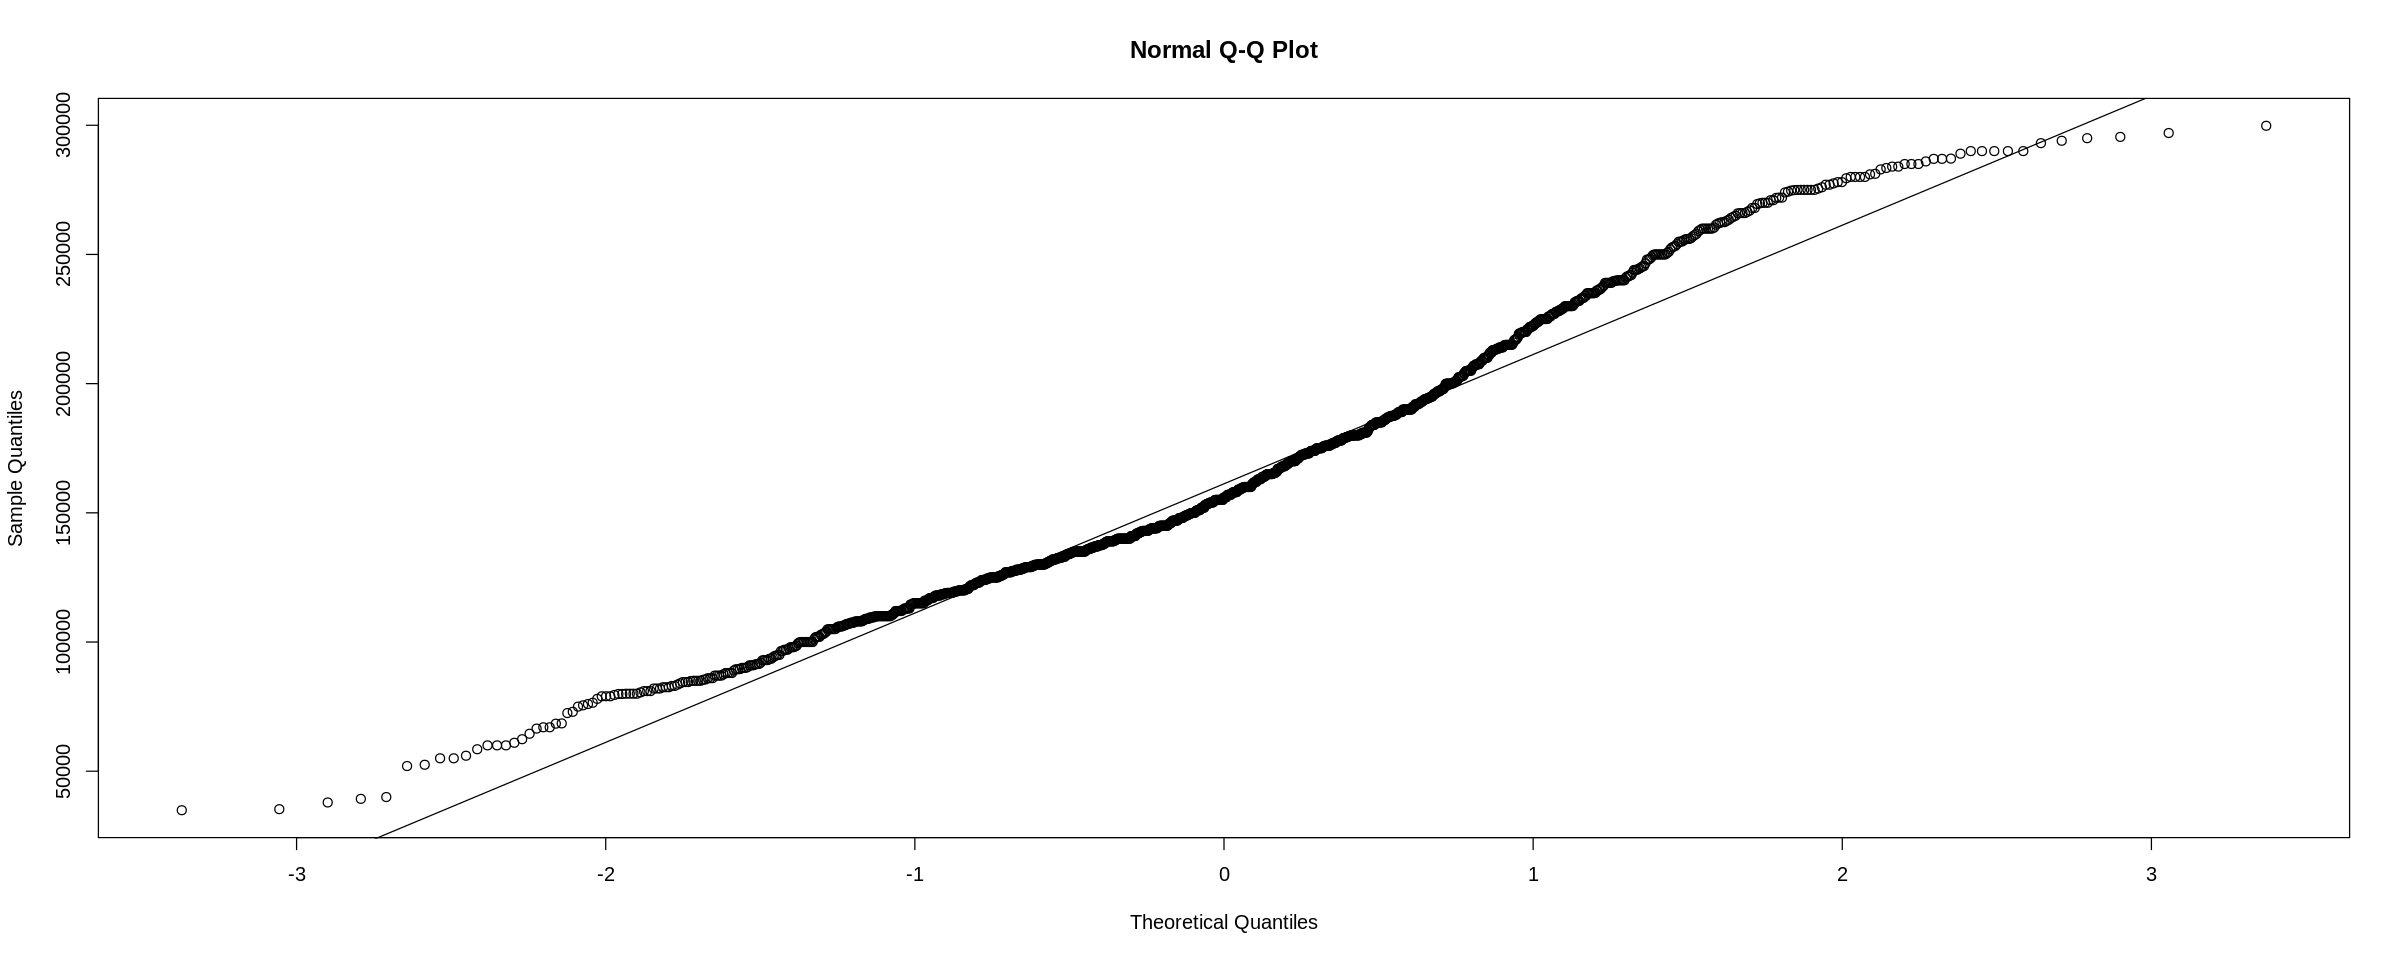

In [14]:
qqnorm(SalePrice.less_than300000)
qqline(SalePrice.less_than300000)

With the outliers removed, the assumption that the data comes from a normal population seems reasonable, and we can apply the procedures based on the t distribution.

In [15]:
t.test(SalePrice.less_than300000,
       mu = 1.62e5, 
       conf.level = 0.90,
       conf.int = TRUE)


	One Sample t-test

data:  SalePrice.less_than300000
t = 1.4277, df = 1336, p-value = 0.1536
alternative hypothesis: true mean is not equal to 162000
90 percent confidence interval:
 161688.6 166384.3
sample estimates:
mean of x 
 164036.5 


Because the $p$-value is large, there is insufficient evidence from the data to conclude the mean sale price is not \$162K.

### Nonparametric Methods

https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

In [16]:
W <- wilcox.test(SalePrice,
                 mu = 1.62e5, 
                 conf.level = 0.90,
                 conf.int = TRUE)

In [17]:
W$conf.int

[1] 167250 173500
attr(,"conf.level")
[1] 0.9